# Ejemplo 1: Describiendo los datos


### Datos que se utilizan en el ejemplo

1. Se utilizan los datos de casos positivos reportados de Covid-19 del Instituto Nacional de Salud (INS). Los datos se puede descargar de las pagina de [Datos Abiertos](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data).

    ##### Diccionario de las variables

    * **year:** Año en que se diagnosticó el contagio de Covid-19.
    * **mes:** Mes en que se diagnosticó el contagio de Covid-19.
    * **dia:** Día en que se diagnosticó el contagio de Covid-19.
    * **caso:** Número de caso de Covid-19.
    * **divipola_depto:** Código divipola del departamento.
    * **depto:** Nombre del departamento.
    * **divipola_mpio:** Código divipola del municipio.
    * **mpio:** Nombre del municipio.
    * **edad:** Edad de la personas.
    * **grupo_edad:** Grupo de edades.
    * **sexo:** Sexo al ancer de la persona.
    * **contagio:** Tipo de contagio.
        
    ###
2. Se utilizan los datos del total de casos positivos de Covid-19 e indicadores del mercado laboral provenientes de la **Gran Encuesta Integrada de Hogares (GEIH)** del [DANE](https://www.dane.gov.co/index.php/estadisticas-por-tema/mercado-laboral/empleo-y-desempleo/geih-historicos) de frecuencia mensual. 
    
    ##### Diccionario de las variables
    * **year:** Año.
    * **mes:** Mes.
    * **divipola_depto:** Código divipola del departamento.
    * **depto:** Nombre del departamento.
    * **casos_covid:** Número de casos positivos de Covid-19.
    * **pop_covid:** Proporción de la población del departamento que se con casos positivos de Covid-19.
    * **pea:** Población economicamente activa.
    * **pei:** Población economicamente inactiva.
    * **tdes:** Tasa de desempleo.
    * **tocu:** Tasa de ocupacion.
    * **Confinamiento:** Toma el valor de 1 en los meses que hubo confinamiento nacional, 0 en otro caso.
    


### Se importan las librerias

In [34]:
#Importamos las librerias
import pandas as pd #Para manejo de la base de datos (Dataframe)
import numpy as np # Para manipulación de matrices y funciones matemáticas.
import matplotlib.pyplot as plt #Para realizar graficas
import seaborn as sns #Para realizar graficas
import scipy.stats as stats #Para calcular el coeficiente de correlación

#### Nota: De los numerales 1 hasta el 3.2. se utilizan los datos de casos positivos de Covid-19 en Colombia.

## 1. ¿Cómo se ven los datos?

In [7]:
#Importamos los datos en un Dataframe y le asignamos el nombre de casos_covid
casos_covid = pd.concat([pd.read_csv('Data/COVID/Casos_positivos_COVID_2020.csv', encoding='UTF-8'),
                         pd.read_csv('Data/COVID/Casos_positivos_COVID_2021.csv', encoding='UTF-8'),
                         pd.read_csv('Data/COVID/Casos_positivos_COVID_2022.csv', encoding='UTF-8')], ignore_index=True)

Para ver la forma en como estan estructurados los datos se utiza el método `.head()` que por defecto muestra las primero 5 observaciones, o se utiliza el método `.tail()` que por defecto muestra los últimos 5 datos.

In [8]:
#Las primero 5 observaciones 
casos_covid.head()

,year,mes,dia,caso,divipola_depto,depto,divipola_mpio,mpio,edad,grupo_edad,sexo,contagio
0,2020,9,7,675918,18,Caqueta,18001,Florencia,64,60 o mas,Masculino,Comunitaria
1,2020,9,7,675919,50,Meta,50001,Villavicencio,57,29-59,Masculino,Comunitaria
2,2020,9,7,675920,76,Valle del cauca,76001,Cali,33,29-59,Femenino,Comunitaria
3,2020,9,7,675921,20,Cesar,20001,Valledupar,34,29-59,Femenino,Comunitaria
4,2020,9,7,675922,8,Atlantico,8001,Barranquilla,45,29-59,Masculino,Comunitaria


In [9]:
#Las primero 10 observaciones 
casos_covid.head(10)

,year,mes,dia,caso,divipola_depto,depto,divipola_mpio,mpio,edad,grupo_edad,sexo,contagio
0,2020,9,7,675918,18,Caqueta,18001,Florencia,64,60 o mas,Masculino,Comunitaria
1,2020,9,7,675919,50,Meta,50001,Villavicencio,57,29-59,Masculino,Comunitaria
2,2020,9,7,675920,76,Valle del cauca,76001,Cali,33,29-59,Femenino,Comunitaria
3,2020,9,7,675921,20,Cesar,20001,Valledupar,34,29-59,Femenino,Comunitaria
4,2020,9,7,675922,8,Atlantico,8001,Barranquilla,45,29-59,Masculino,Comunitaria
5,2020,9,2,675923,52,Nariño,52356,Ipiales,75,60 o mas,Masculino,Comunitaria
6,2020,9,7,675924,76,Valle del cauca,76001,Cali,27,15-28,Masculino,Comunitaria
7,2020,9,7,675925,76,Valle del cauca,76001,Cali,89,60 o mas,Masculino,Comunitaria
8,2020,9,7,675926,20,Cesar,20001,Valledupar,58,29-59,Masculino,Comunitaria
9,2020,9,7,675927,41,Huila,41885,Yaguara,36,29-59,Masculino,Relacionado


In [10]:
#La ultimas 5 observaciones
casos_covid.tail()

,year,mes,dia,caso,divipola_depto,depto,divipola_mpio,mpio,edad,grupo_edad,sexo,contagio
6350816,2022,1,30,5956386,50,Meta,50001,Villavicencio,47,29-59,Masculino,Comunitaria
6350817,2022,1,30,5956387,50,Meta,50001,Villavicencio,39,29-59,Masculino,Relacionado
6350818,2022,1,30,5956388,50,Meta,50001,Villavicencio,35,29-59,Masculino,Comunitaria
6350819,2022,1,30,5956389,50,Meta,50001,Villavicencio,11,5-14,Masculino,Comunitaria
6350820,2022,1,30,5956390,50,Meta,50001,Villavicencio,34,29-59,Femenino,Comunitaria


In [11]:
#La ultimas 5 observaciones
casos_covid.tail(10)

,year,mes,dia,caso,divipola_depto,depto,divipola_mpio,mpio,edad,grupo_edad,sexo,contagio
6350811,2022,1,30,5956381,50,Meta,50001,Villavicencio,65,60 o mas,Femenino,Relacionado
6350812,2022,1,30,5956382,50,Meta,50568,Puerto Gaitan,52,29-59,Femenino,Relacionado
6350813,2022,1,30,5956383,50,Meta,50001,Villavicencio,90,60 o mas,Masculino,Comunitaria
6350814,2022,1,30,5956384,50,Meta,50568,Puerto Gaitan,60,60 o mas,Masculino,Relacionado
6350815,2022,1,30,5956385,50,Meta,50001,Villavicencio,48,29-59,Masculino,Comunitaria
6350816,2022,1,30,5956386,50,Meta,50001,Villavicencio,47,29-59,Masculino,Comunitaria
6350817,2022,1,30,5956387,50,Meta,50001,Villavicencio,39,29-59,Masculino,Relacionado
6350818,2022,1,30,5956388,50,Meta,50001,Villavicencio,35,29-59,Masculino,Comunitaria
6350819,2022,1,30,5956389,50,Meta,50001,Villavicencio,11,5-14,Masculino,Comunitaria
6350820,2022,1,30,5956390,50,Meta,50001,Villavicencio,34,29-59,Femenino,Comunitaria


## 2. Tablas de frecuencia

Una tabla de frecuencia sirve para determinar el número de elementos que hay por cada categoría posible de una variable categórica.

### 2.1. Frecuencia Absoluta

La *Frecuencia Absoluta* muestra el número de veces que se observa una categoria específica (o un valor específico) en un conjunto de datos. Es decir, indica al cantidad de veces que repite una categoria en la muestra o población de datos que se esté estudiando. 

### 2.2. Frecuencia Relativa

La *Frecuencia Relativa* es una medida que indica la proporción o porcentaje de veces que ocurre una categoria específica (o un valor específico) en un conjunto de datos. 


Para ello, utilizamos el método `.values_counts()` de la libreria de **Pandas**.

In [12]:
#Frecuencia Absoluta de los casos positivos de Covid-19 por año
frec_year = pd.value_counts(casos_covid['year'], sort=False) 
frec_year

2020    1706673
2021    3489916
2022    1154232
Name: year, dtype: int64

In [13]:
#Frecuencia Absoluta de los casos positivos de Covid-19 por departamento
frec_depto = pd.value_counts(casos_covid['depto'], sort=True) # la opción sort organiza de forma desendente las frecuencias
frec_depto

Bogota             1871194
Antioquia           949632
Valle del cauca     568448
Atlantico           417687
Cundinamarca        329918
Santander           295807
Bolivar             203405
Boyaca              130001
Tolima              127301
Norte Santander     125150
Cordoba             122490
Caldas              119641
Magdalena           117738
Risaralda           109932
Cesar               109377
Nariño              108388
Meta                107777
Huila               103230
Cauca                76650
Quindio              73059
Sucre                67138
Guajira              58086
Casanare             43035
Caqueta              25685
Putumayo             21936
Choco                18887
Arauca               17104
San Andres           10368
Amazonas              7845
Guaviare              5678
Vichada               3476
Guainia               2795
Vaupes                1963
Name: depto, dtype: int64

In [14]:
#Frecuencia Absoluta de los casos positivos de Covid-19 por sexo al nacer
frec_gen = pd.value_counts(casos_covid['sexo'], sort=True)
frec_gen

Femenino     3393857
Masculino    2956964
Name: sexo, dtype: int64

In [15]:
#Frecuencia Absoluta de los casos positivos de Covid-19 por grupo de edad
frec_edad = pd.value_counts(casos_covid['grupo_edad'], sort=True)
frec_edad

29-59         3483282
15-28         1450820
60 o mas      1003007
5-14           310141
Menos de 5     103571
Name: grupo_edad, dtype: int64

In [16]:
#Guardamos los resultados de la frecuencia absoluta de casos positivos de Covid-19 en un Dataframe
df_fre_depto = pd.DataFrame(frec_depto) #Se genera el Dataframe
df_fre_depto.columns = ['frec_abs'] #Se le asigna nombre a la columna de frecuencia absoluta
df_fre_depto.head(10)

,frec_abs
Bogota,1871194
Antioquia,949632
Valle del cauca,568448
Atlantico,417687
Cundinamarca,329918
Santander,295807
Bolivar,203405
Boyaca,130001
Tolima,127301
Norte Santander,125150


In [17]:
#Calculamos la frecuencia relativa para los casos positivos de Covid-19 por departamento

#Nota: Agregamos la opción normalize=True y se multiplica por 100 para mostrar los porcentajes

frec_depto2 = pd.value_counts(casos_covid['depto'], sort=True, normalize=True)*100 
frec_depto2

Bogota             29.463813
Antioquia          14.952901
Valle del cauca     8.950780
Atlantico           6.576898
Cundinamarca        5.194887
Santander           4.657776
Bolivar             3.202814
Boyaca              2.046995
Tolima              2.004481
Norte Santander     1.970611
Cordoba             1.928727
Caldas              1.883867
Magdalena           1.853902
Risaralda           1.730989
Cesar               1.722250
Nariño              1.706677
Meta                1.697056
Huila               1.625459
Cauca               1.206931
Quindio             1.150387
Sucre               1.057155
Guajira             0.914622
Casanare            0.677629
Caqueta             0.404436
Putumayo            0.345404
Choco               0.297395
Arauca              0.269320
San Andres          0.163254
Amazonas            0.123527
Guaviare            0.089406
Vichada             0.054733
Guainia             0.044010
Vaupes              0.030909
Name: depto, dtype: float64

In [18]:
#Guardamos los reaultados de la frecuencia relativa en un Dataframe
df_fre_depto2 = pd.DataFrame(frec_depto2) #Se genera el Dataframe
df_fre_depto2.columns = ['frec_rel%'] #Se le asigna nombre a la columna de frecuencia absoluta
df_fre_depto2.head(10)

,frec_rel%
Bogota,29.463813
Antioquia,14.952901
Valle del cauca,8.950780
Atlantico,6.576898
Cundinamarca,5.194887
Santander,4.657776
Bolivar,3.202814
Boyaca,2.046995
Tolima,2.004481
Norte Santander,1.970611


In [19]:
#Unimos los dos Dataframe en uno solo
tab_frec_depto = pd.concat([df_fre_depto,df_fre_depto2], axis=1)
tab_frec_depto

,frec_abs,frec_rel%
Bogota,1871194,29.463813
Antioquia,949632,14.952901
Valle del cauca,568448,8.950780
Atlantico,417687,6.576898
Cundinamarca,329918,5.194887
Santander,295807,4.657776
Bolivar,203405,3.202814
Boyaca,130001,2.046995
Tolima,127301,2.004481
Norte Santander,125150,1.970611


## 3. Estadísticas Descriptivas

### 3.1. Histogramas y densidades

##### Histograma

Los histogramas son el análogo a las tablas de frecuencia para una variable continua: para ello, ‘discretizan’ los datos en intervalos y se cuenta el número de elementos entre los intervalos.

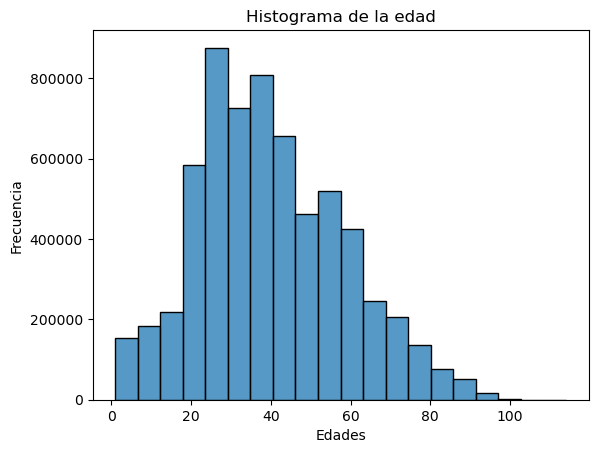

In [22]:
#Se realiza un hitograma de la edad de las personas
sns.histplot(casos_covid['edad'], bins=20, kde=False)
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Histograma de la edad')
plt.show()

##### Densidad

Las densidades son versiones ‘suavizadas’ del histograma, muy útiles para ver múltiples distribuciones al tiempo.

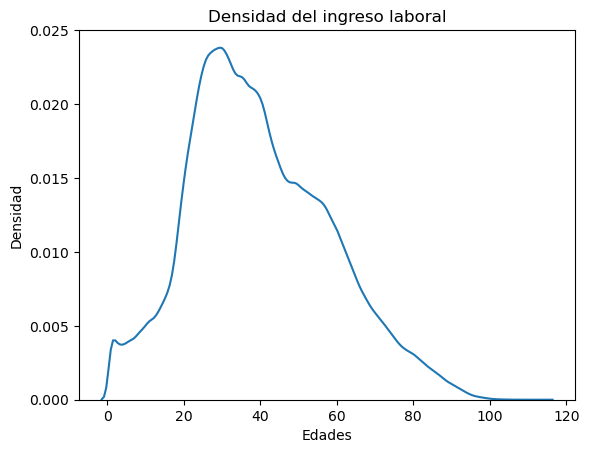

In [21]:
#Se realiza un gráfico de densidad de la edad
sns.kdeplot(casos_covid['edad'])
plt.xlabel('Edades')
plt.ylabel('Densidad')
plt.title('Densidad del ingreso laboral')
plt.show()

### 3.2. Tabulación cruzada

Las tablas de frecuencia se pueden hacer combinando las categorías de dos variables. Nos muestra la distribución conjunta de los datos. Lo que hacemos es observar cómo cambia la distribución de una variable si condicionamos los datos a la categoría de otra. Si la distribución es la misma sin importan en cuál categoría de referencia se seleccione, los datos son independientes; si hay cambios grandes, hay una correlación fuerte entre las variables.

Para realizar la tabulación cruzada se utiliza la función `crosstab` de la libreria de `Pandas`.

In [24]:
# Queremos verl el número de contagios por años y por sexo al nacer 
pd.crosstab(casos_covid['year'], casos_covid['sexo'])

sexo,Femenino,Masculino
year,,
2020,865806,840867
2021,1866800,1623116
2022,661251,492981


In [25]:
#Ahora queremosverl el número de contagio por grupo de edad, tipo de contagio y sexo al nacer
pd.crosstab([casos_covid['contagio'], casos_covid['sexo']], casos_covid['grupo_edad'])

grupo_edad              15-28    29-59   5-14  60 o mas  Menos de 5
contagio    sexo                                                   
Comunitaria Femenino   559131  1294194  79303    399259       28403
            Masculino  472648  1138515  81019    322604       32548
Importado   Femenino      427     1110     44       289          14
            Masculino     341     1148     45       263          18
Relacionado Femenino   228549   568505  74076    140193       20360
            Masculino  189724   479810  75654    140399       22228

#### Nota: En el numeral 3.3 se utilizan los datos de casos positivos de Covid-19 e indicadores del mercado laboral.

### 3.3. Coeficiente de correlación

¿Qué tanto varían en común un grupo de variables continuas? La idea es la misma de las tabulaciones cruzadas.  Los coeficientes de correlación van entre -1 y 1 y nos dicen si las variables se mueven en una misma dirección (cerca a 1), en sentidos opuestos (cerca a -1), o sencillamente son independientes (cerca a 0).

Para calcular el coeficiente de correlación enter dos variables de un Dataframe podemos usar la función `corr()` de la libreria de `Pandas`.

In [75]:
#Importamos los datos en un Dataframe y le asignamos el nombre de covid_ml
covid_ml = pd.read_csv('Data/COVID/COVID_ML_2020.csv', encoding='UTF-8')
covid_ml.head()

,year,mes,divipola_depto,depto,casos_covid,pop_covid,pea,pei,tdes,tocu,confinamiento
0,2020,1,5,Antioquia,0,0.000000,59.958744,40.041256,14.603990,51.202374,0
1,2020,2,5,Antioquia,0,0.000000,61.424278,38.575722,12.747436,53.594257,0
2,2020,3,5,Antioquia,102,0.021568,57.904770,42.095230,14.279778,49.636097,0
3,2020,4,5,Antioquia,348,0.071382,55.452789,44.547211,23.089958,42.648766,1
4,2020,5,5,Antioquia,723,0.138676,55.033058,44.966942,22.421679,42.693722,1


In [85]:
#Miramos para que periodo están los casos de Covid-19
covid_ml.drop_duplicates(subset=['year', 'mes'])[['year', 'mes']]

,year,mes
0,2020,1
1,2020,2
2,2020,3
3,2020,4
4,2020,5
5,2020,6
6,2020,7
7,2020,8
8,2020,9
9,2020,10


In [90]:
#Calculamos el coeficiente de correlacion entre la tasa de desempleo y el número de casos positivos de Covid-19.
corr_todo = covid_ml[['casos_covid','tdes']].corr().iloc[0,-1]
print('El coeficiente de correlación entre los casos de Covid-19 y la tasa de desempleo es', corr_todo)

El coeficiente de correlación entre los casos de Covid-19 y la tasa de desempleo es -0.02633587598942235


In [95]:
#Ahora calculemos el coeficiente de correlaicón para cada Departamento
corr_depto = covid_ml.groupby('depto')[['casos_covid', 'tdes']].corr().iloc[0::2, -1]
corr_depto

depto                       
Amazonas         casos_covid   -0.350828
Antioquia        casos_covid   -0.209235
Arauca           casos_covid    0.190103
Atlantico        casos_covid    0.110813
Bogota           casos_covid    0.226862
Bolivar          casos_covid    0.194454
Boyaca           casos_covid    0.415561
Caldas           casos_covid   -0.136465
Caqueta          casos_covid   -0.141455
Casanare         casos_covid   -0.158558
Cauca            casos_covid    0.117016
Cesar            casos_covid    0.135022
Choco            casos_covid   -0.350730
Cordoba          casos_covid    0.429410
Cundinamarca     casos_covid   -0.214130
Guainia          casos_covid    0.207921
Guajira          casos_covid   -0.318601
Guaviare         casos_covid   -0.544623
Huila            casos_covid   -0.461087
Magdalena        casos_covid   -0.167335
Meta             casos_covid   -0.160009
Nariño           casos_covid   -0.458903
Norte Santander  casos_covid   -0.428415
Putumayo         casos_covid